<a href="https://colab.research.google.com/github/Pushkarsharma0016/Emotion-Detection/blob/main/facial_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
data = {}
with open('/content/legend.csv') as f:
  reader = csv.reader(f)
  next(reader)
  for row in reader:
    key = row[2].lower()
    if key in data:
      data[key].append(row[1])
    else:
      data[key] = [row[1]]

In [2]:
emotion_list = list(data.keys())
emotion_list

['anger',
 'surprise',
 'disgust',
 'fear',
 'neutral',
 'happiness',
 'sadness',
 'contempt']

In [3]:

#/content/master_data
#os.mkdir('/content/drive/master_data')
#os.mkdir('master_data/drive/training')
#os.mkdir('master_data/drive/testing')

In [4]:
#for emotion in emotion_list:
 # os.mkdir(os.path.join('master_data/training/', emotion))
 # os.mkdir(os.path.join('master_data/testing/', emotion))

In [5]:
import os
from shutil import copyfile
split_size = 0.8

for emotion, images in data.items():
  train_size = int(split_size*len(images))
  train_images = images[:train_size]
  test_images = images[train_size:]
  for image in train_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/training', emotion, image)
    copyfile(source, dest)
  for image in test_images:
    source = os.path.join('/content/facial_expressions/images', image)
    dest = os.path.join('/content/master_data/testing', emotion, image)
    copyfile(source, dest)

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [7]:
model = tf.keras.models.Sequential([
      Conv2D(16, (3,3), activation='relu', input_shape = (100, 100, 3)),
      MaxPooling2D(2, 2),
      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2, 2),
      Flatten(),
      Dense(1024, activation='relu'),
      Dense(8, activation='softmax')
])
model.compile(optimizer = Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
train_dir = '/content/master_data/training'
test_dir = '/content/master_data/testing'

train_datagen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

test_datagen = ImageDataGenerator(rescale = 1.0/255)
test_generator = test_datagen.flow_from_directory(
                                                    test_dir,
                                                    target_size = (100, 100),
                                                    class_mode = 'categorical',
                                                    batch_size = 128
                                                  )

Found 10941 images belonging to 8 classes.
Found 2742 images belonging to 8 classes.


In [9]:
es = EarlyStopping(monitor='val_acc', patience = 2, min_delta=0.01)

In [10]:
model.fit_generator(train_generator,
                    epochs = 10,
                    verbose = 1,
                    validation_data = test_generator,
                    callbacks = [es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
86/86 [==============================] - 25s 252ms/step - loss: 1.4627 - acc: 0.4784 - val_loss: 1.0081 - val_acc: 0.5011
Epoch 2/10
86/86 [==============================] - 19s 218ms/step - loss: 1.0220 - acc: 0.4991 - val_loss: 2.3003 - val_acc: 0.3505
Epoch 3/10
86/86 [==============================] - 16s 181ms/step - loss: 1.0128 - acc: 0.5028 - val_loss: 1.0385 - val_acc: 0.4956


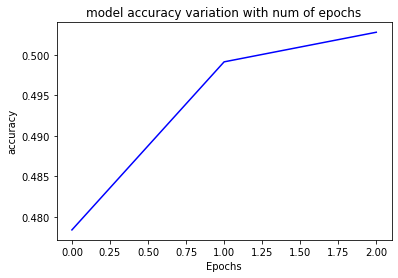

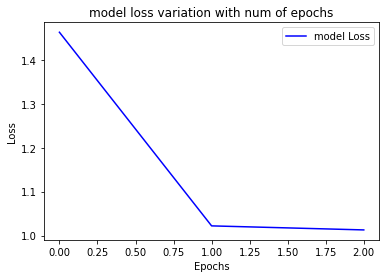

In [11]:
#let's look at how loss and accuracy changed while training
import matplotlib.pyplot as plt
history = model.history
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='model accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title('model accuracy variation with num of epochs')

plt.figure()

plt.plot(epochs, loss, 'b', label='model Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('model loss variation with num of epochs')
plt.legend()

plt.show()